In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pickle
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
df.shape

(20491, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.describe(include='all')

,Review,Rating
count,20491,20491.000000
unique,20491,NaN
top,nice hotel expensive parking got good deal sta...,NaN
freq,1,NaN
mean,NaN,3.952223
std,NaN,1.233030
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000


In [6]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

<Axes: xlabel='Rating'>

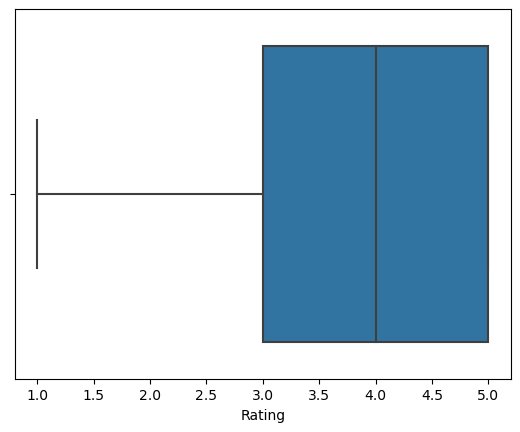

In [7]:
sns.boxplot(x = df['Rating'])

<Axes: xlabel='Rating', ylabel='count'>

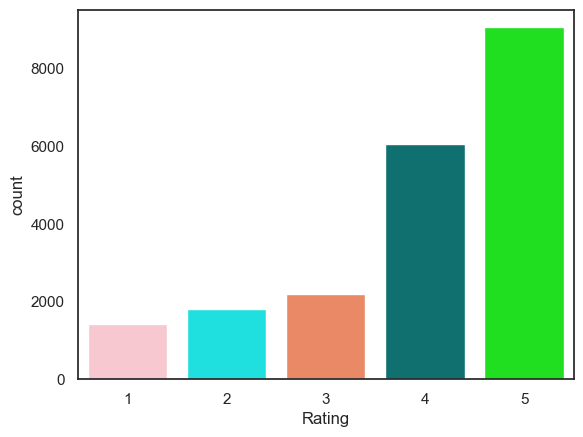

In [8]:
sns.set_theme(style="white", color_codes=True)
sns.countplot(x = df['Rating'], palette=['pink', 'Aqua','coral','teal', 'lime']) 

In [9]:
df['Word_count']= df['Review'].map(lambda x: len(x.split()))

In [10]:
df.head(1)

,Review,Rating,Word_count
0,nice hotel expensive parking got good deal sta...,4,87


<Axes: xlabel='Rating', ylabel='Word_count'>

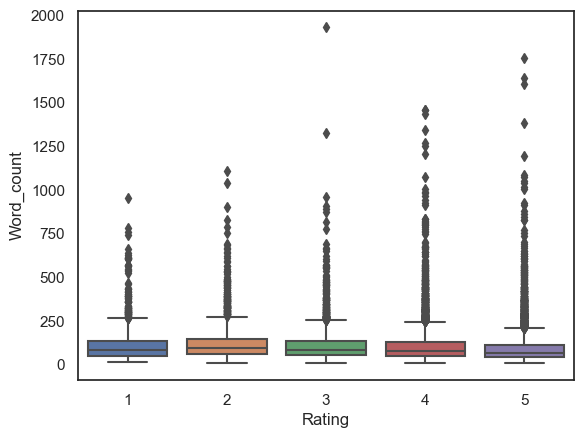

In [11]:
sns.boxplot(x = 'Rating', y='Word_count', data=df)

<Axes: xlabel='Rating', ylabel='Word_count'>

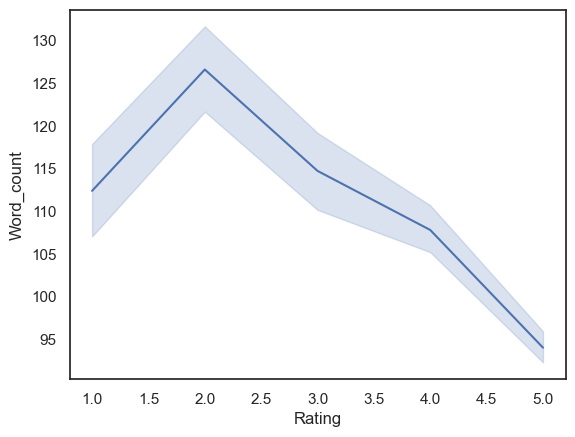

In [12]:
sns.lineplot(x='Rating', y='Word_count', data=df)

In [13]:
def polarity(x):
    blob = TextBlob(x)
    return blob.sentiment.polarity

In [14]:
def subjectivity(x):
    blob = TextBlob(x)
    return blob.sentiment.subjectivity

In [15]:
df['polarity']= df['Review'].apply(polarity)
df['Subjectivity']= df['Review'].apply(subjectivity)


In [16]:
df.head(1)

,Review,Rating,Word_count,polarity,Subjectivity
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687


In [17]:
conditions = [
    (df['polarity']>0),
    (df['polarity']<0),
    (df['polarity']==0)
]
values = ['Positive','Negative','Nuetral']
df['polarity_new'] = np.select(conditions,values)

<Axes: xlabel='polarity', ylabel='Density'>

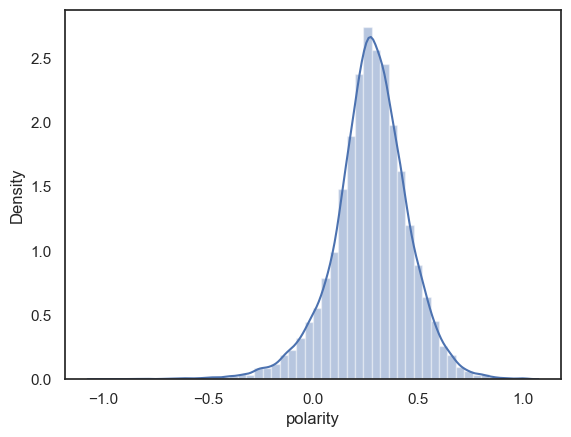

In [18]:
sns.distplot(df['polarity'])

<Axes: xlabel='Subjectivity', ylabel='Density'>

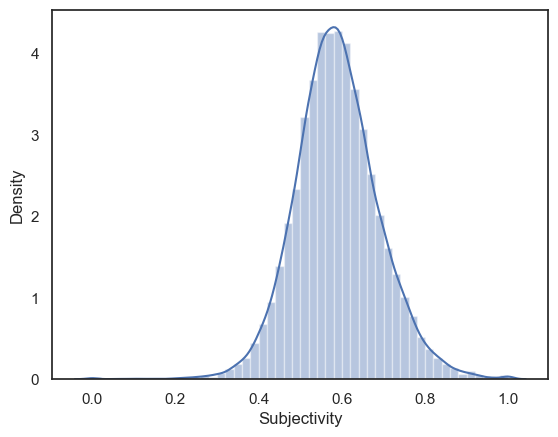

In [19]:
sns.distplot(df['Subjectivity'])

<Axes: xlabel='polarity_new', ylabel='count'>

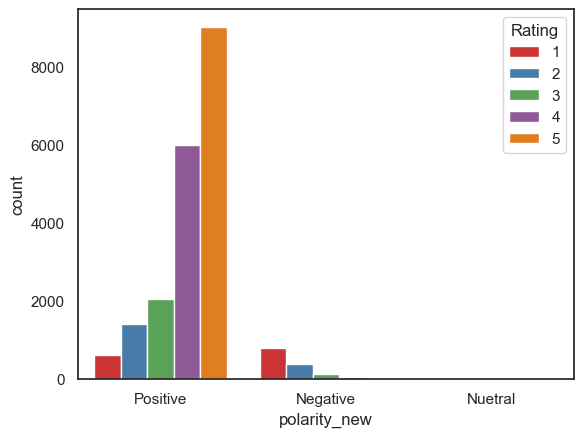

In [20]:
sns.countplot(x='polarity_new',hue='Rating',data=df, palette="Set1")

<Axes: xlabel='Rating', ylabel='polarity'>

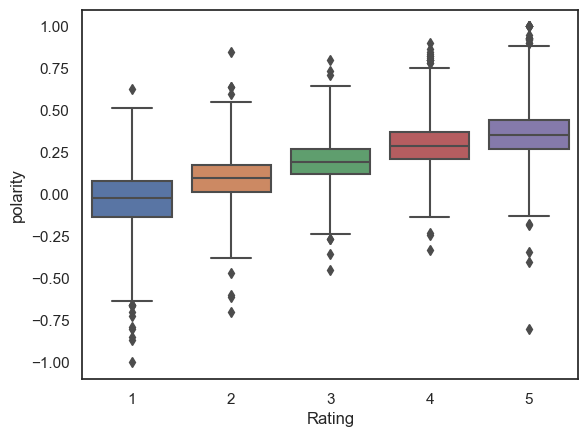

In [21]:
sns.boxplot(x='Rating',y='polarity', data=df, whis=2.5, fliersize= 5)

<Axes: xlabel='Rating', ylabel='Subjectivity'>

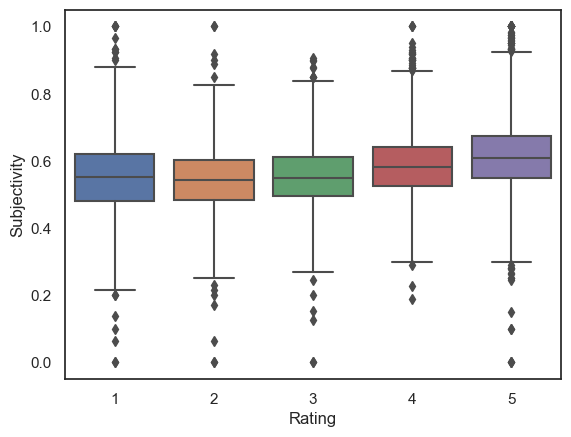

In [22]:
sns.boxplot(x='Rating',y='Subjectivity', data=df, whis=2)

In [23]:
df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

In [24]:
df.head()

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new
0,nice hotel expensive parking got good deal sta...,4,87,0.208744,0.687000,Positive
1,ok nothing special charge diamond member hilto...,2,250,0.214923,0.495009,Positive
2,nice rooms 4* experience hotel monaco seattle ...,3,217,0.294420,0.605208,Positive
3,"unique, great stay, wonderful time hotel monac...",5,89,0.504825,0.691228,Positive
4,"great stay great stay, went seahawk game aweso...",5,191,0.384615,0.629396,Positive


In [25]:
df['Review_stemming'] = df['Review'].str.split()
pd.set_option('display.max_colwidth', -1)
df['Review_stemming'] = df['Review_stemming'].apply(lambda x: [stemmer.stem(y) for y in x])

In [26]:
df.head(1)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]"


In [27]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['Review_lemmatize'] = df.Review.apply(lemmatize_text)

In [28]:
df.head(1)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687,Positive,"[nice, hotel, expens, park, got, good, deal, stay, hotel, anniversary,, arriv, late, even, took, advic, previous, review, valet, parking,, check, quick, easy,, littl, disappoint, non-exist, view, room, room, clean, nice, size,, bed, comfort, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morn, loud, bang, door, open, close, hear, peopl, talk, hallway,, mayb, noisi, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantag, stay, longer,, locat, great, walk, distanc, shopping,, overal, nice, experi, pay, 40, park, night,]","[nice, hotel, expensive, parking, got, good, deal, stay, hotel, anniversary,, arrived, late, evening, took, advice, previous, review, valet, parking,, check, quick, easy,, little, disappointed, non-existent, view, room, room, clean, nice, size,, bed, comfortable, woke, stiff, neck, high, pillows,, soundproof, like, heard, music, room, night, morning, loud, bang, door, opening, closing, hear, people, talking, hallway,, maybe, noisy, neighbors,, aveda, bath, product, nice,, goldfish, stay, nice, touch, taken, advantage, staying, longer,, location, great, walking, distance, shopping,, overall, nice, experience, pay, 40, parking, night,]"


In [29]:
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [30]:
make_sentences(df,'Review_stemming')
make_sentences(df,'Review_lemmatize')

In [31]:
df.head(1)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,"


In [32]:
rev_stemming = " ".join([review for review in df['Review_stemming']])
rev_stemming[:2000]

'nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,  ok noth special charg diamond member hilton decid chain shot 20th anniversari seattle, start book suit paid extra websit descript not, suit bedroom bathroom standard hotel room, took print reserv desk show said thing like tv couch ect desk clerk told oh mix suit descript kimpton websit sorri free breakfast, got kidding, embassi suit sit room bathroom bedroom unlik kimpton call suite, 5 day stay offer correct fals advertising, send kimpton prefer guest websit email ask failur provid suit 

In [33]:
rev_lmtz = " ".join([review for review in df['Review_lemmatize']])
rev_lmtz[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,  ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said thing like tv couch ect desk clerk told oh mixed suite description kimpton website sorry free breakfast, got kidding, embassy suit sitting room bathroom bedroom unlike kimpton call suite, 5 day stay offer

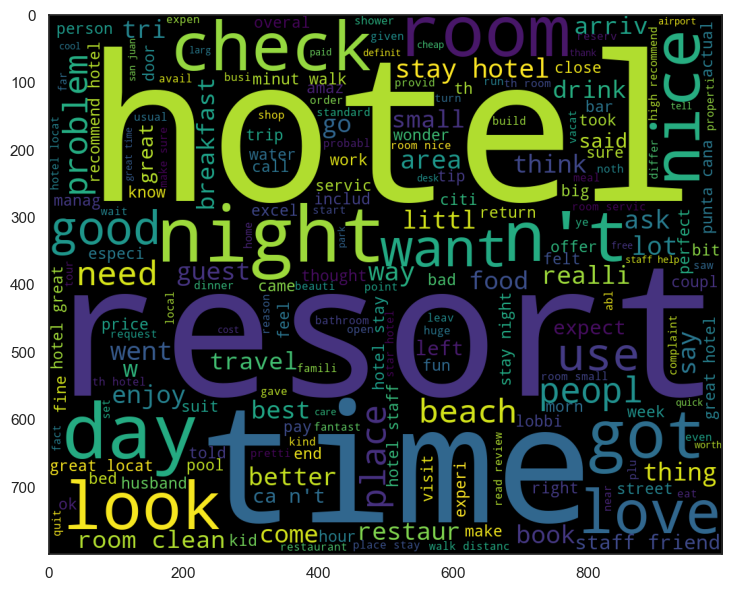

In [34]:
plt.figure(figsize=(12,7))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_stemming)
plt.imshow(wc)

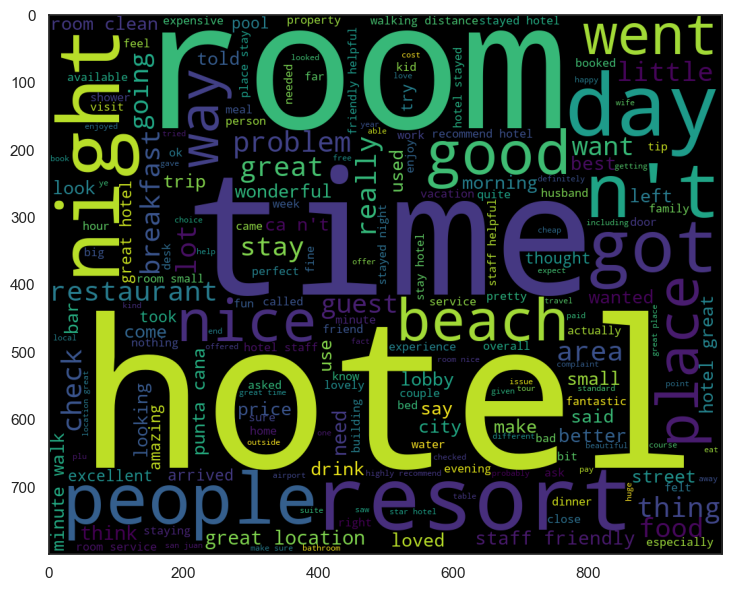

In [35]:
plt.figure(figsize=(12,7))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev_lmtz)
plt.imshow(wc)

In [36]:
def sentiment(review):
    if review>=3:
        return 1
    else:
        return 0
df['Sentiment']= df['Rating'].apply(sentiment)

In [37]:
df.head(1)

,Review,Rating,Word_count,polarity,Subjectivity,polarity_new,Review_stemming,Review_lemmatize,Sentiment
0,"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",4,87,0.208744,0.687,Positive,"nice hotel expens park got good deal stay hotel anniversary, arriv late even took advic previous review valet parking, check quick easy, littl disappoint non-exist view room room clean nice size, bed comfort woke stiff neck high pillows, soundproof like heard music room night morn loud bang door open close hear peopl talk hallway, mayb noisi neighbors, aveda bath product nice, goldfish stay nice touch taken advantag stay longer, locat great walk distanc shopping, overal nice experi pay 40 park night,","nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous review valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, soundproof like heard music room night morning loud bang door opening closing hear people talking hallway, maybe noisy neighbors, aveda bath product nice, goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,",1


In [38]:
X= df['Review_stemming']
Y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, Y, test_size=0.25, stratify=Y)

In [39]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_tfidf= tfidf.fit_transform(X_train.values)
X_test_tfidf= tfidf.transform(X_test.values)

In [40]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))

In [41]:
lr= LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr.predict(X_test_tfidf)

In [42]:
    pickle.dump(lr, open('trip_review.pkl', 'wb'))

In [43]:
print(confusion_matrix(y_test,y_pred_tfidf))
print(accuracy_score(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))

[[ 477  327]
 [  65 4254]]
0.9234823345695882
              precision    recall  f1-score   support

           0       0.88      0.59      0.71       804
           1       0.93      0.98      0.96      4319

    accuracy                           0.92      5123
   macro avg       0.90      0.79      0.83      5123
weighted avg       0.92      0.92      0.92      5123



In [44]:
clf = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train_tfidf,y_train)
y_pred = clf.predict(X_test_tfidf)

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[ 309  495]
 [  50 4269]]
              precision    recall  f1-score   support

           0       0.86      0.38      0.53       804
           1       0.90      0.99      0.94      4319

    accuracy                           0.89      5123
   macro avg       0.88      0.69      0.74      5123
weighted avg       0.89      0.89      0.88      5123

0.8936170212765957


In [45]:
X_train_tfidf = X_train_tfidf.todense()
X_test_tfidf = X_test_tfidf.todense()

In [46]:
model = pickle.load(open('trip_review.pkl','rb'))
tfidf = pickle.load(open('tfidf.pkl','rb'))

In [47]:
def review_predictor(text):
    df =pd.DataFrame([[text]],columns=['Review'])
    df['Review'] = df['Review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
    df['Review'] = df['Review'].str.split()
    df['Review'] = df['Review'].apply(lambda x: [stemmer.stem(y) for y in x])
    df['Review'] = df['Review'].apply(lambda x:' '.join([i+' ' for i in x]))
    df['Review'] = df['Review'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    X = df['Review']
    X = tfidf.transform(X)
    X = model.predict(X)
    X = X[0]
    return X

In [48]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")

Please enter a Review:
goof
Positive Review


In [49]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")

Please enter a Review:
never visit
Positive Review


In [50]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")

Please enter a Review:
never visit this place again
Positive Review


In [51]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")

Please enter a Review:
worst
Negative Review


In [ ]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")

In [ ]:
test = input("Please enter a Review:\n")
predict = review_predictor(test)
if predict == 0:
    print("Negative Review")
else:
    print("Positive Review")